# Task 1: Importing and Introduction

In [34]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [35]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [43]:
colors = []
[a_color for a_color in [[hex(a)[2:] for a in np.random.randint(256, size=3)] for i in range(3)]]


[<zip at 0x1252d1d70>, <zip at 0x1252d10f0>, <zip at 0x124fcdf00>]

In [18]:
def get_random_colors(count):
    color_array =  [[hex(a)[2:] for a in np.random.randint(256, size=3)] for i in range(count)]
    
    colors =[]
    for a_color in color_array:
        color = '#'
        for item in a_color:
            if(len(item) == 2):
                color += str(item)
            else: 
                color += '0' + str(item)
        colors.append(color)

    return colors

cols = get_random_colors(20)
cols

['#a6f857',
 '#fc55c6',
 '#02a9ff',
 '#7f527f',
 '#8d342a',
 '#d73071',
 '#bb8933',
 '#ec06f5',
 '#06f421',
 '#9aa83e',
 '#08325d',
 '#950b18',
 '#084b2a',
 '#79a695',
 '#d43ba3',
 '#6d5919',
 '#0ea8b9',
 '#c34c32',
 '#aabb89',
 '#3fda57']

# Task 2: Dataset Creation and Preprocessing

In [19]:
X, y = make_blobs(
    n_features=50,
    centers=20,
    n_samples=20000,
    cluster_std=0.2,
    center_box=[-1, 1],
    random_state=17
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=17
)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Task 3: Baseline Model

In [21]:
pca = PCA(n_components=2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

Text(0.5, 1.0, 'PCA Results')

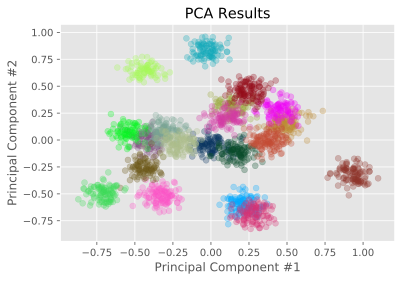

In [22]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test == unique_label]
    
    plt.scatter(X_data[:, 0], X_data[:, 1], alpha=0.3, c=cols[index])
    
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Results')

# Task 4: Autoencoder Theory and Training

In [23]:
autoencoder = MLPRegressor(
    alpha=1e-15,
    hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
    random_state=1,
    max_iter=20000
)
autoencoder.fit(X_train, X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_iter=20000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Task 5: Reducing Dimensionality with Encoder

In [24]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [25]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [26]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [27]:
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if(index + 1 == len(encoder_weights)):
            res_ae = res_ae@w + b
        else:
            res_ae = np.maximum(0, res_ae@w + b)
    return res_ae

In [28]:
res_ae = encode(encoder_weights, encoder_biases, X_test)

In [29]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

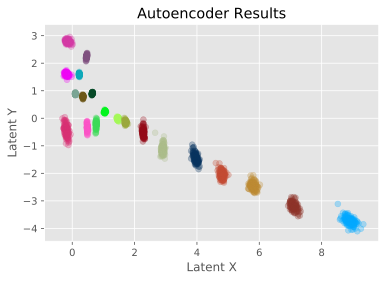

In [30]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test == unique_label]
    plt.scatter(latent_space[:, 0], latent_space[:, 1], alpha=0.3, c=cols[index])
    
plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [31]:
silhouette_score(X_test, y_test)

0.6100948647899368

In [32]:
silhouette_score(res_pca, y_test)

0.36794875364498403

In [33]:
silhouette_score(res_ae, y_test)

0.8074659601859903